In [22]:
import scanpy as sc
import scvi
from pathlib import Path
import matplotlib.pyplot as plt

In [23]:
DATA = Path("../data")
MODEL = Path("../model")

In [24]:
vae = scvi.model.SCVI.load(MODEL / 'trained2.model')
adata = vae.adata

INFO     File ..\model\trained2.model\model.pt already downloaded                                                  


In [25]:
adata.obsm['X_scVI'] = vae.get_latent_representation()
adata.obsm['X_normalized'] = vae.get_normalized_expression()

In [26]:
de_cd4 = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='CD4',
    group2='aDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_cd4 = de_cd4[(de_cd4['lfc_mean'] < 0) & (de_cd4['bayes_factor'] > 0)]

DE...: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


In [27]:
de_cd8 = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='CD8',
    group2='aDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_cd8 = de_cd8[(de_cd8['lfc_mean'] < 0) & (de_cd8['bayes_factor'] > 0)]

DE...: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


In [28]:
de_nk = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='NK',
    group2='aDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_nk = de_nk[(de_nk['lfc_mean'] < 0) & (de_nk['bayes_factor'] > 0)]

DE...: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


In [29]:
deg_adnt = {}
deg_adnt['CD4'] = de_cd4[:10].index.tolist()
deg_adnt['CD8'] = de_cd8[:10].index.tolist()
deg_adnt['NK'] = de_nk[:10].index.tolist()

In [30]:
adata_sub = adata[
    (adata.obs['cell_type'] == "aDNT") |
    (adata.obs['cell_type'] == 'CD4') | 
    (adata.obs['cell_type'] == 'CD8') |
    (adata.obs['cell_type'] == 'NK')
    ]

In [31]:
def to_curly(gene: str) -> str:
    curly_gene = ("$" + gene + "$")
    return curly_gene

symbols = []
for name in deg_adnt:
    symbols.extend(list(map(to_curly,deg_adnt[name])))

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


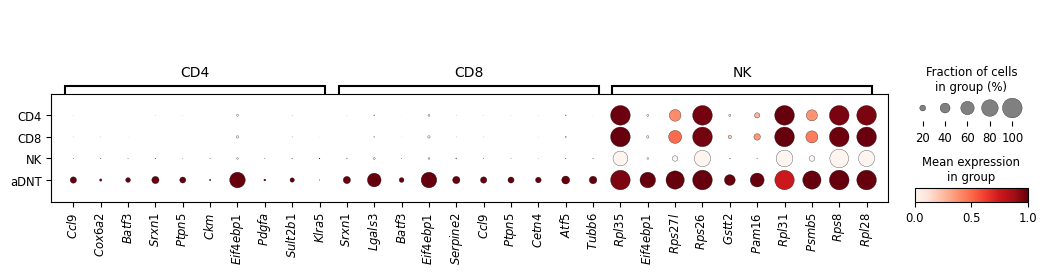

In [32]:
ax = sc.pl.dotplot(
    adata_sub,
    deg_adnt,
    groupby='cell_type',
    use_raw=True,
    standard_scale='var',
    show=False)
ax['mainplot_ax'].set_xticklabels(symbols)
plt.show()

In [33]:
de_cd4 = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='CD4',
    group2='nDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_cd4 = de_cd4[(de_cd4['lfc_mean'] < 0) & (de_cd4['bayes_factor'] > 0)]

de_cd8 = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='CD8',
    group2='nDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_cd8 = de_cd8[(de_cd8['lfc_mean'] < 0) & (de_cd8['bayes_factor'] > 0)]

de_nk = vae.differential_expression(
    adata,
    groupby='cell_type',
    group1='NK',
    group2='nDNT',
    batch_correction = True,
    batchid1 = ['b1','b2'])
de_nk = de_nk[(de_nk['lfc_mean'] < 0) & (de_nk['bayes_factor'] > 0)]

DE...: 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]


In [34]:
deg_ndnt = {}
deg_ndnt['CD4'] = de_cd4[:10].index.tolist()
deg_ndnt['CD8'] = de_cd8[:10].index.tolist()
deg_ndnt['NK'] = de_nk[:10].index.tolist()

In [35]:
adata_sub = adata[
    (adata.obs['cell_type'] == "nDNT") |
    (adata.obs['cell_type'] == 'CD4') | 
    (adata.obs['cell_type'] == 'CD8') |
    (adata.obs['cell_type'] == 'NK')
    ]

In [36]:
symbols = []
for name in deg_adnt:
    symbols.extend(list(map(to_curly,deg_ndnt[name])))

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


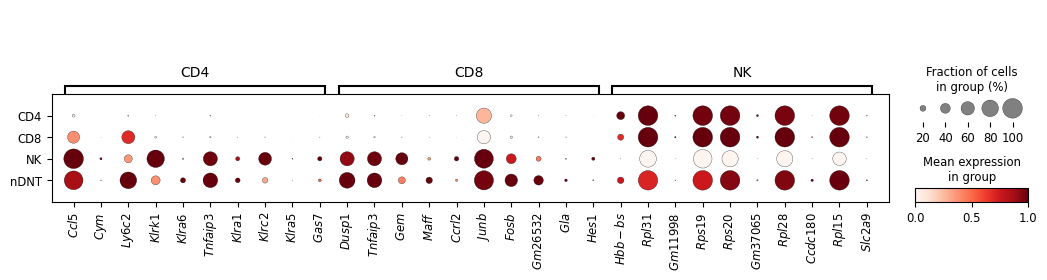

In [37]:
ax = sc.pl.dotplot(
    adata_sub,
    deg_ndnt,
    groupby='cell_type',
    use_raw=True,
    standard_scale='var',
    show=False)
ax['mainplot_ax'].set_xticklabels(symbols)
plt.show()
